# Neutrino Oscillation: Animations

Authors: Lodovico, Lewis<br>
Last Update: 10/03/20

# Introduction
In this notebook, the mathematics of the neutrino oscillation has been implemented, with the resulting functions being used to visually depict this phenomenon with vpython. This is initially applied to the two-flavour case and is eventually extended to three flavours. The oscillation is displayed with the neutrino moving through its 'mass eigenstate space' as a function of time, with the probability being represented by the colour of the sphere (red for electron, green for muon and blue for tau neutrino). 

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow, box, label
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


# Defining Constants

In [13]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)
#delta_CP = 0

# mass differences
dm21_sq = 7.39*10**(-5) # eV^2
dm31_sq = 2.523*10**(-3) # eV^2

# mass eigenstates
m1 = 0.01 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m1*m1 + dm31_sq) # eV 

# total mass 
mtot = m1 + m2 + m3 #eV
assert mtot < 0.23, "Error: total mass not in agreement with experimental bounds"

# calculate third mass difference squared
dm32_sq = m3*m3 - m2*m2 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
E_atm = 10**11 # eV
E_acc = 10**9 #eV

# important constants:

# speed of light
c = 299792.458 # km s^-1 

# Planck constant
hbar = 6.582119569*10**(-16) # eV*s

# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

# The Two Flavour Case

The following defines the orthogonal basis vectors for mass eigenstates $m_1$ and $m_2$, the 2D rotation matrix, $U$ and describes how this is used to trtansform the mass eigenvectors to the flavour eigenvectors. The time independent states are then plotted for an arbitrary theta.

<IPython.core.display.Javascript object>


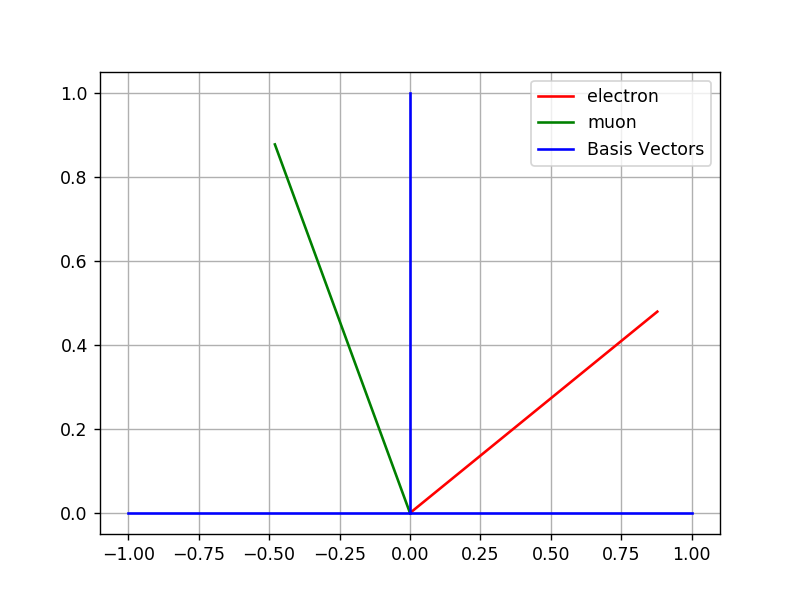

In [14]:
theta=0.5#Mixing Angle
v1=np.array([[1],[0]])#mass1 basis vector
v2=np.array([[0],[1]])#mass2 basis vector
U= np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])#Rotation Matrix
vv=np.array([[v1],[v2]])#Vector of basis vectors 

V = U.dot(vv)# Vector of each flavour in the mass basis
#Time Dependence(hbar set to 1)
t=np.linspace(0,50,1000)
E1=2
E2=5
Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
Tr= Ut.dot(vv)

#Plotting flavours for t=0  
plt.figure()
plt.grid(True)

l1=([0,V[0,0]])
l2=([0,V[0,1]])
l3=([0,V[1,0]])
l4=([0,V[1,1]])
plt.plot(l1,l2,'r-',label='electron')
plt.plot(l3,l4,'g-',label='muon')
plt.plot([-1,1],[0,0],'b-',label='Basis Vectors')
plt.plot([0,0],[0,1],'b-')
plt.legend()

## Defining Functions for each animation

In [4]:
def electron(theta,E1,E2):
    """
    A function that executes the two flavour neutrino oscillation starting from ve
    """
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    scene.camera.pos=vector(0,0,1.73205)
    scene.camera.axis=vector(0,0,-1.73205)
    
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)

    # ...and the bob.
    e_neutrino = sphere(pos=vector(Tr[0,0],Tr[0,1],0), 
                      radius = 0.1, color=color.white, make_trail=True,retain=20)
    space= box(pos=vector(20,0,-1),length=170,width=1,height=30,texture="space.jpg.png")
    

    N=200
    # Loop for electron neutrino 
    


    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[0,0]
        ypos=Tr[0,1]
    
        e_neutrino.pos= vector(xpos,ypos,0)
        space.pos=vector(20-10*t[i],0,-1)
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        label(pos=vector(1,0,0), text='M1')
        label(pos=vector(0,0.8,0), text='M2')
    

                   
        P=((np.sin(2*theta))**2)*np.sin((E1-E2)*t[i]/2)#Probability that an electron neutrino turns into a muon neutrino
        e_neutrino.color= vector(1-abs(P),abs(P),0)#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(10) # max number of screen updates per second
        #print(bob.color)

In [15]:
def muon(theta,E1,E2):
    """
    A function that executes the two flavour neutrino oscillation starting from vm
    """
    scene= canvas(background=color.white)
    scene.camera.pos=vector(0,0,1.73205)
    scene.camera.axis=vector(0,0,-1.73205)
    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)

    # ...and the bob.
    m_neutrino = sphere(pos=vector(Tr[1,0],Tr[1,1],0), 
                      radius = 0.1, color=color.white, make_trail=True, retain=20)
    space= box(pos=vector(20,0,-1),length=170,width=1,height=30,texture="space.jpg.png")

    N=200
    
    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[1,0]
        ypos=Tr[1,1]
    
        m_neutrino.pos= vector(xpos,ypos,0)
        space.pos=vector(20-10*t[i],0,-1)
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        label(pos=vector(1,0,0), text='M1')
        label(pos=vector(0,0.8,0), text='M2')
    

                   
        Pm=((np.sin(2*theta))**2)*(np.sin(-(E1-E2)*t[i]/2))**2#Probability that a muon neutrino turns into an electron neutrino
        m_neutrino.color= vector(abs(Pm),1-abs(Pm),0)#red= probability of  transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(8) # max number of screen updates per second
        #print(m_neutrino.color)

# Input Dependent Animation

In [17]:
theta= float(input("Input Mixing Angle(Radians)"))
E1= float(input("Input Mass 1 energy(in range1-10)"))
E2= float(input("Input Mass 2 energy(in range 1-10)"))
f= (input("Input flavour (e or m):"))
if f in ['e','E','electron','Electron']:
    print("Initially electron neutrino" )
    electron(theta,E1,E2)
if f in ['m','M','Mu','MU','mu','Muon','muon'] :
    print("Initially muon neutrino" )
    muon(theta,E1,E2)
else:
        print('End')

Input Mixing Angle(Radians)1
Input Mass 1 energy(in range1-10)3
Input Mass 2 energy(in range 1-10)7
Input flavour (e or m):m
Initially muon neutrino


<IPython.core.display.Javascript object>